In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style

import re


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('F:/datasetOrpon/ml/IMDB Dataset.csv')
#F:\datasetOrpon\ml

# Display the first few rows of the DataFrame to check that the dataset has been loaded correctly
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [5]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [6]:
df['word count'] = df['review'].apply(no_of_words)

In [7]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


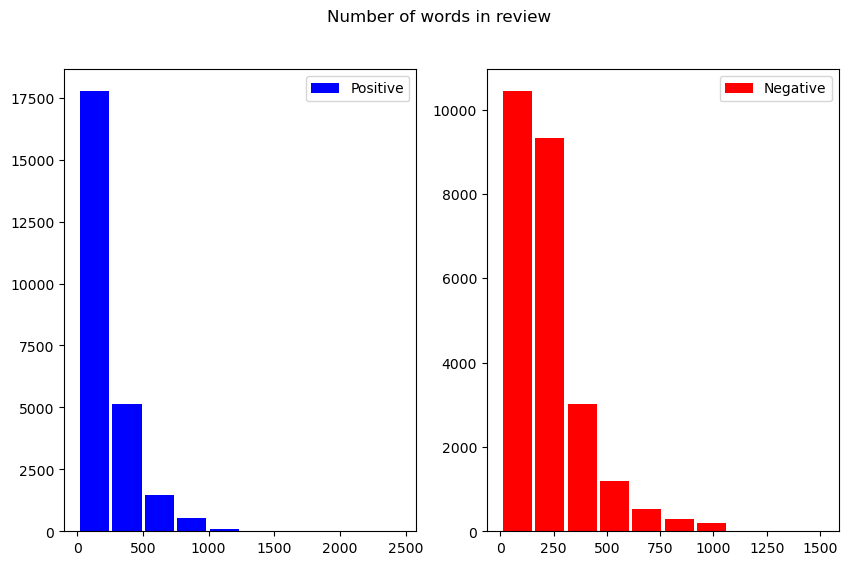

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [9]:


df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)



In [10]:


df.head()



,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [11]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)



In [12]:
X = df['review']
Y = df['sentiment']

In [13]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (40000, 101895)
Size of y_train:  (40000,)
Size of x_test:  (10000, 101895)
Size of y_test:  (10000,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.03%


In [18]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.38%


>>>> Plotting Accuracy graph <<<<


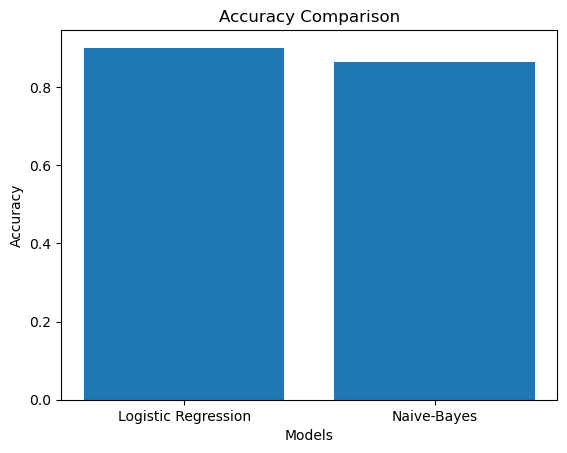

In [20]:
print('>>>> Plotting Accuracy graph <<<<')
models, accuracy = ['Logistic Regression', 'Naive-Bayes'], [logreg_acc, mnb_acc]
plt.title('Accuracy Comparison')
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
question 2

In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

data = pd.read_csv('F:/datasetOrpon/ml/IMDB Dataset.csv')
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data['review'] = data['review'].str.lower()
data['review'] = data['review'].str.replace('[^\w\s]','')
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:

# Make sure x_train and x_test have the same number of samples
assert len(x_train) == len(x_test.toarray())

# Create a validation set
train_data, val_data, train_labels, val_labels = train_test_split(x_train, x_test, test_size=0.1, random_state=42)

# Tokenize the text and create sequences of equal length
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data)
train_sequences = tokenizer.texts_to_sequences(train_data)
val_sequences = tokenizer.texts_to_sequences(val_data)
test_sequences = tokenizer.texts_to_sequences(test_data)
max_len = max([len(x) for x in train_sequences])
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post')
val_sequences = pad_sequences(val_sequences, maxlen=max_len, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post')




TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_sequences, train_labels, batch_size=32, epochs=5, validation_data=(val_sequences, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(test_sequences, test_labels)
print('Test accuracy:', accuracy)
print('Test loss:', loss)